# Indian Premier League

### by Karan Sharma - Feb 2021

In this project we will try to find out the most successful teams and players along with the factors contributing to win or loss of a team. we will also perform Exploratory data analysis on this dataset. personally, i took this project in order to improve data cleaning skills. so, we will be spending sufficient time doing data cleaning as well. 

### **dataset** - [link](https://bit.ly/34SRn3b)

## Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# for filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
deliveries = pd.read_csv('Downloads/Datasets/IPL/deliveries.csv')
matches = pd.read_csv('Downloads/Datasets/IPL/matches.csv')

In [3]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [4]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


lets try to explore matches dataframe first

In [5]:
matches.shape

(756, 18)

In [6]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [9]:
matches.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [10]:
matches['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [11]:
# we'll use this in future 
ids_missing = matches.loc[matches['result'] == 'no result', 'id'].to_list()
season_missing = matches.loc[matches['result'] == 'no result', 'season'].to_list()

# Matches with No Result
matches.loc[matches['result'] == 'no result']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


Above, as there is no winner in the matches and player of the match is also missing, i think we should delete above rows

In [12]:
# Matches with result as 'tie'
matches.loc[matches['result'] == 'tie'].head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
33,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
189,190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
400,401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN


In [13]:
# Matches with Duckworth lewis Rule Applied 
matches.loc[matches['dl_applied'] != 0].head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
56,57,2017,Bangalore,2017-05-17,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,NaN
99,100,2008,Delhi,2008-05-17,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,NaN
102,103,2008,Kolkata,2008-05-18,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,NaN
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
122,123,2009,Durban,2009-04-21,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,NaN


In [14]:
matches['city'].value_counts().head()

Mumbai       101
Kolkata       77
Delhi         74
Bangalore     66
Hyderabad     64
Name: city, dtype: int64

In [15]:
matches['venue'].value_counts().head()

Eden Gardens                                 77
M Chinnaswamy Stadium                        73
Wankhede Stadium                             73
Feroz Shah Kotla                             67
Rajiv Gandhi International Stadium, Uppal    56
Name: venue, dtype: int64

## Data Cleaning

In [16]:
to_drop  = ['date', 'umpire1', 'umpire2', 'umpire3', 'dl_applied']

matches.drop(columns = to_drop, inplace = True)  #dropping columns

In [17]:
matches.set_index('id', inplace = True)

In [18]:
matches.head()

,season,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,
1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [19]:
to_drop = matches.index[matches['result'] == 'no result']

matches.drop(index = to_drop, inplace = True)  #dropping indexes including no winner

In [20]:
matches[matches['city'].isnull()]

,season,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,
462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
463,2014,NaN,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium
467,2014,NaN,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
469,2014,NaN,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
470,2014,NaN,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
475,2014,NaN,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
477,2014,NaN,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium


In [21]:
# replacing Dubai inplace of nan values
matches.loc[matches['city'].isnull(), 'city'] = 'Dubai'

In [22]:
matches.head()

,season,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,
1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [23]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 1 to 11415
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           752 non-null    int64 
 1   city             752 non-null    object
 2   team1            752 non-null    object
 3   team2            752 non-null    object
 4   toss_winner      752 non-null    object
 5   toss_decision    752 non-null    object
 6   result           752 non-null    object
 7   winner           752 non-null    object
 8   win_by_runs      752 non-null    int64 
 9   win_by_wickets   752 non-null    int64 
 10  player_of_match  752 non-null    object
 11  venue            752 non-null    object
dtypes: int64(3), object(9)
memory usage: 76.4+ KB


#### lets explore and clean deliveries dataframe

In [24]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [25]:
deliveries.shape

(179078, 21)

In [26]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [27]:
deliveries['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [28]:
deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [29]:
deliveries.groupby('batsman').batsman_runs.sum().sort_values(ascending = False)

batsman
V Kohli         5434
SK Raina        5415
RG Sharma       4914
DA Warner       4741
S Dhawan        4632
                ... 
J Denly            0
C Nanda            0
RR Bhatkal         0
K Ahmed            0
Abdur Razzak       0
Name: batsman_runs, Length: 516, dtype: int64

In [30]:
deliveries.is_super_over.value_counts()

0    178997
1        81
Name: is_super_over, dtype: int64

In [31]:
deliveries.player_dismissed.value_counts()

SK Raina        162
RG Sharma       155
RV Uthappa      153
V Kohli         143
S Dhawan        137
               ... 
L Plunkett        1
UA Birla          1
S Lamichhane      1
KP Appanna        1
Kamran Khan       1
Name: player_dismissed, Length: 487, dtype: int64

In [32]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [33]:
# filling null values with 0 in fielder, player_dismissed, dismissal_kind columns
deliveries.fillna(0, inplace = True)

In [34]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [35]:
# extracting relevant columns for visualization
main_columns = ['match_id','batting_team', 'bowling_team','over', 'ball','batsman', 'bowler','batsman_runs',
                'total_runs', 'player_dismissed', 'dismissal_kind']

deliveries_main = deliveries[main_columns]

In [36]:
deliveries_main.head()

,match_id,batting_team,bowling_team,over,ball,batsman,bowler,batsman_runs,total_runs,player_dismissed,dismissal_kind
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,TS Mills,0,0,0,0
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,TS Mills,0,0,0,0
2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,TS Mills,4,4,0,0
3,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,TS Mills,0,0,0,0
4,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,TS Mills,0,2,0,0


In [37]:
matches.reset_index(inplace = True)

In [38]:
matches.rename(columns = {'id':'match_id'}, inplace = True)

In [39]:
matches.head(2)

,match_id,season,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium


In [40]:
# Adding season column in deliveries_main based on match_id

for id, season in zip(matches.match_id.to_list(), matches.season.to_list()):
    deliveries_main.loc[deliveries_main['match_id'] == id, 'season'] = season

In [41]:
deliveries_main.loc[deliveries_main.season.isnull()]

,match_id,batting_team,bowling_team,over,ball,batsman,bowler,batsman_runs,total_runs,player_dismissed,dismissal_kind,season
70930,301,Delhi Daredevils,Pune Warriors,1,1,NV Ojha,AC Thomas,1,1,0,0,NaN
70931,301,Delhi Daredevils,Pune Warriors,1,2,DA Warner,AC Thomas,0,1,0,0,NaN
70932,301,Delhi Daredevils,Pune Warriors,1,3,NV Ojha,AC Thomas,0,0,0,0,NaN
70933,301,Delhi Daredevils,Pune Warriors,1,4,NV Ojha,AC Thomas,0,0,0,0,NaN
70934,301,Delhi Daredevils,Pune Warriors,1,5,NV Ojha,AC Thomas,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
176458,11340,Rajasthan Royals,Royal Challengers Bangalore,3,4,SV Samson,K Khejroliya,0,0,0,0,NaN
176459,11340,Rajasthan Royals,Royal Challengers Bangalore,3,5,SV Samson,K Khejroliya,6,6,0,0,NaN
176460,11340,Rajasthan Royals,Royal Challengers Bangalore,3,6,SV Samson,K Khejroliya,4,4,0,0,NaN
176461,11340,Rajasthan Royals,Royal Challengers Bangalore,4,1,L Livingstone,YS Chahal,1,2,0,0,NaN


In [42]:
deliveries_main.loc[deliveries_main.season.isnull(), 'match_id'].unique()

array([  301,   546,   571, 11340], dtype=int64)

using missing_ids, missing_season (defined earlier) for filling season null values based on match_id

In [43]:
ids_missing

[301, 546, 571, 11340]

In [44]:
# filling nan values

for id, season in zip(ids_missing, season_missing):
    deliveries_main.loc[deliveries_main['match_id'] == id, 'season'] = season
    

two cleaned and preprocessed dataFrames

In [45]:
deliveries_main.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
bowler              0
batsman_runs        0
total_runs          0
player_dismissed    0
dismissal_kind      0
season              0
dtype: int64

In [46]:
matches.isnull().sum()

match_id           0
season             0
city               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [47]:
deliveries_main.season = deliveries_main.season.astype('int')

In [48]:
deliveries_main.head()

,match_id,batting_team,bowling_team,over,ball,batsman,bowler,batsman_runs,total_runs,player_dismissed,dismissal_kind,season
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,TS Mills,0,0,0,0,2017
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,TS Mills,0,0,0,0,2017
2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,TS Mills,4,4,0,0,2017
3,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,TS Mills,0,0,0,0,2017
4,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,TS Mills,0,2,0,0,2017


In [49]:
matches.head()

,match_id,season,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


## Exploratory Data Analysis

In [50]:
season_finals = matches.groupby('season').apply(lambda x :x.match_id.max()).to_list()
winners = matches.loc[matches.match_id.apply(lambda x : True if x in season_finals else False)]
winners = winners.sort_values(by = 'season')

In [51]:
# winning teams of each season
winners[['season', 'winner']].reset_index(drop = True)

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


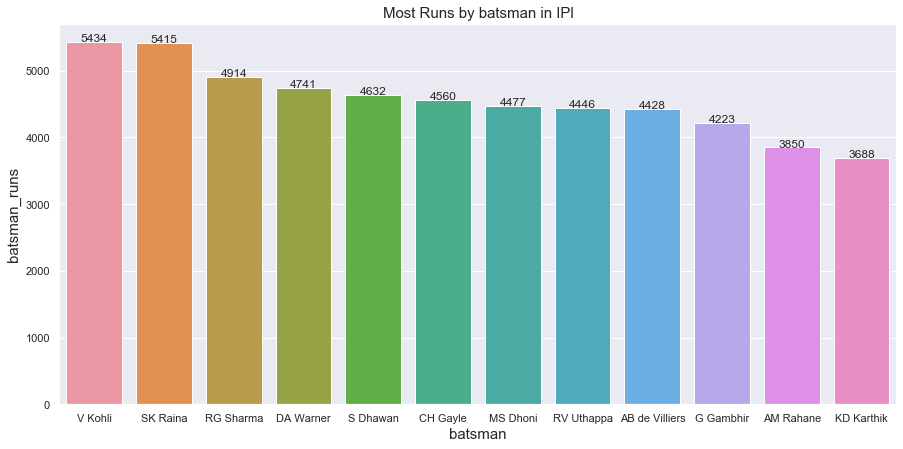

In [52]:
data = deliveries_main.groupby('batsman').sum().sort_values(by = 'batsman_runs',ascending  = False).reset_index().head(12)
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
ax.set_title('Most Runs by batsman in IPl', fontsize = 15)
ax.set_xlabel('Batsman', fontsize = 15)
ax.set_ylabel('Batsman runs', fontsize = 15)
ax = sns.barplot(x = 'batsman', y = 'batsman_runs', data = data)
for index, row in data.iterrows():
    ax.text(index, row.batsman_runs + 5, str(row.batsman_runs), ha = 'center')

In [53]:
data = deliveries_main.groupby(['season', 'batsman']).sum().reset_index().sort_values(by = 'batsman_runs', ascending = False)
data.drop_duplicates(subset = ['season'], inplace = True)

In [54]:
# orange cap winners per season
data = data.sort_values(by = 'season').reset_index(drop = True)
data[['season', 'batsman', 'batsman_runs']]

,season,batsman,batsman_runs
0,2008,SE Marsh,616
1,2009,ML Hayden,572
2,2010,SR Tendulkar,618
3,2011,CH Gayle,608
4,2012,CH Gayle,733
5,2013,MEK Hussey,733
6,2014,RV Uthappa,660
7,2015,DA Warner,562
8,2016,V Kohli,973
9,2017,DA Warner,641


In [55]:
data.batsman[0]

'SE Marsh'

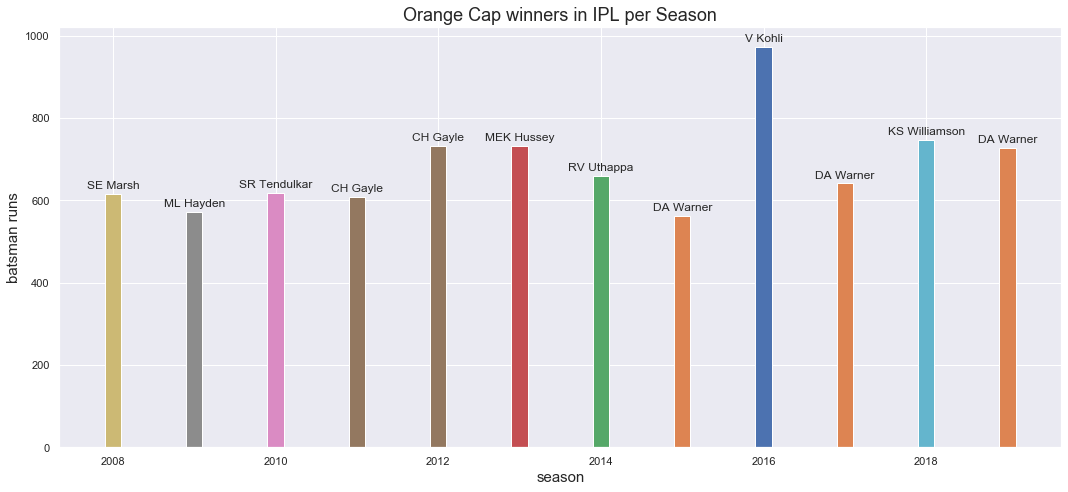

In [56]:
fig, ax = plt.subplots(figsize = (15, 7))
labels = data.season
color = ['C8', 'C7', 'C6', 'C5', 'C5', 'C3','C2', 'C1', 'C0', 'C1', 'C9', 'C1']
rects1 = ax.bar(data.season , data.batsman_runs, label = labels, color = color, width = 0.2)
ax.set_title('Orange Cap winners in IPL per Season', fontsize = 18)
ax.set_xlabel('season', fontsize = 15)
ax.set_ylabel('batsman runs', fontsize = 15)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    i = 0
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(data.batsman[i]),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        i += 1

autolabel(rects1)
fig.tight_layout()

DA Warner is three times Orange cap winner in seasons - 2015, 2017, 2019

In [57]:
bat_first = matches.loc[matches.win_by_runs != 0].win_by_runs.value_counts().sum()
field_first = matches.shape[0] - bat_first

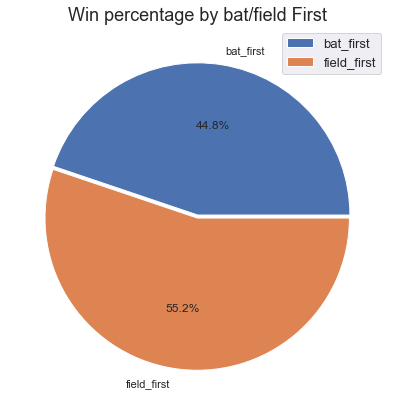

In [58]:
data = pd.DataFrame(data = [[bat_first, field_first]], columns = ['bat_first', 'field_first'])
labels = ['bat_first', 'field_first']
explode = (0.01, 0.01)
plt.figure(figsize = (7, 7))
plt.pie(data, autopct = '%1.1f%%',labels = labels, explode = explode)
ax = plt.title('Win percentage by bat/field First', fontsize = 18)
plt.legend(fontsize = 13)

In [59]:
no_of_matches_won = matches.winner.value_counts()
no_of_matches_played = matches.team1.value_counts() + matches.team2.value_counts()

In [60]:
no_of_matches_won['Rising Pune Supergiants'] += (no_of_matches_won['Rising Pune Supergiant'] + no_of_matches_won['Pune Warriors'])
no_of_matches_won['Delhi Capitals'] += no_of_matches_won['Delhi Daredevils']

no_of_matches_played['Rising Pune Supergiants'] += (no_of_matches_played['Rising Pune Supergiant'] + no_of_matches_played['Pune Warriors'])
no_of_matches_played['Delhi Capitals'] += no_of_matches_played['Delhi Daredevils']

In [61]:
no_of_matches_played.drop(['Rising Pune Supergiant', 'Pune Warriors', 'Delhi Daredevils'], inplace  = True)
no_of_matches_won.drop(['Rising Pune Supergiant', 'Pune Warriors', 'Delhi Daredevils'], inplace  = True)

In [62]:
winning_percentage = no_of_matches_won/no_of_matches_played
df = pd.concat([no_of_matches_played, no_of_matches_won, round(winning_percentage * 100, 1)], axis = 1)
df = pd.DataFrame(data = df.values, columns = ['no_of_matches_played', 'no_of_matches_won', 'winning_percentage'], index = df.index)

In [63]:
df[['no_of_matches_played', 'no_of_matches_won']] = df[['no_of_matches_played', 'no_of_matches_won']].astype('int')

In [64]:
df = df.astype('int')
df.sort_values(by = 'no_of_matches_played', ascending = False)

,no_of_matches_played,no_of_matches_won,winning_percentage
Mumbai Indians,187,109,58
Kolkata Knight Riders,178,92,51
Royal Challengers Bangalore,177,84,47
Kings XI Punjab,176,82,46
Delhi Capitals,175,77,44
Chennai Super Kings,164,100,61
Rajasthan Royals,145,75,51
Sunrisers Hyderabad,108,58,53
Deccan Chargers,75,29,38
Rising Pune Supergiants,75,27,36


In [65]:
labels = df.index.to_list()
no_of_matches_played = df.no_of_matches_played.to_list()
no_of_matches_won = df.no_of_matches_won.to_list()
# winning_percentage = [int(i) for i in winning_percentage]

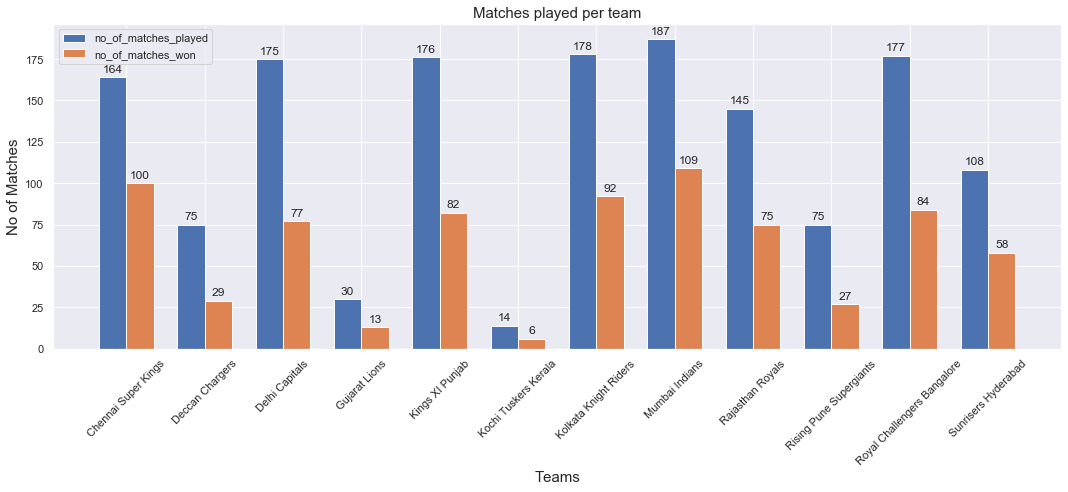

In [66]:
width = 0.35
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize = (15, 7))
rects1 = ax.bar(x - width/2, no_of_matches_played, width, label='no_of_matches_played')
rects2 = ax.bar(x + width/2, no_of_matches_won, width, label='no_of_matches_won')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('No of Matches', fontsize = 15)
ax.set_title('Matches played per team', fontsize = 15)
ax.set_xlabel('Teams', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 45)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

In [67]:
df = df.sort_values(by = 'winning_percentage')

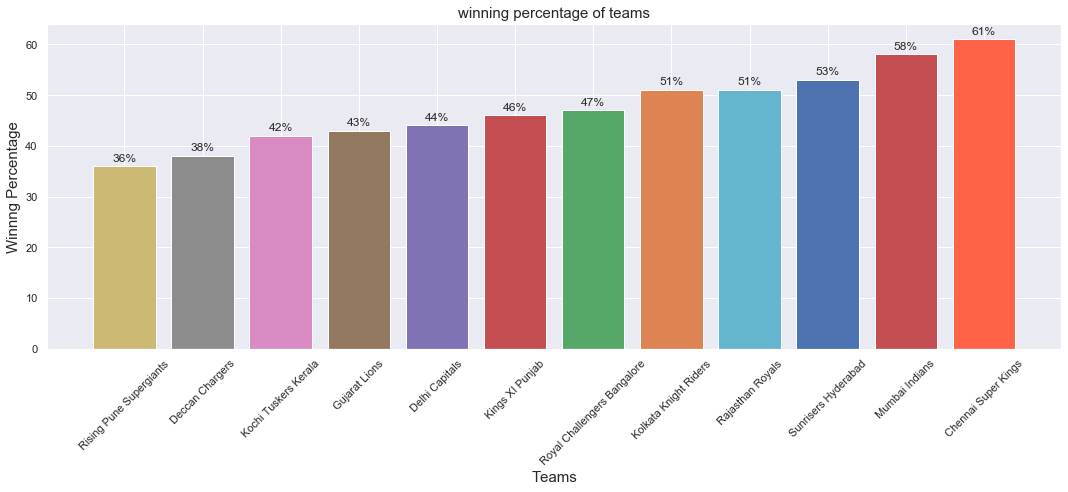

In [68]:
fig, ax = plt.subplots(figsize = (15, 7))
color = ['C8', 'C7', 'C6', 'C5', 'C4', 'C3','C2', 'C1', 'C9', 'C10', 'C13', 'tomato']
rects1 = ax.bar(df.index , df.winning_percentage, color = color)
ax.set_title('winning percentage of teams', fontsize = 15)
ax.set_xlabel('Teams', fontsize = 15)
ax.set_ylabel('Winnng Percentage', fontsize = 15)
g = ax.set_xticklabels(df.index, rotation  = 45)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
fig.tight_layout()

In [69]:
# total wickets taken by bowler
print(deliveries_main.dismissal_kind.unique())
wickets_type = ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']

[0 'caught' 'bowled' 'run out' 'lbw' 'caught and bowled' 'stumped'
 'retired hurt' 'hit wicket' 'obstructing the field']


In [70]:
# Bowlers with Most Wickets

data = deliveries_main.loc[deliveries_main['dismissal_kind'].apply(lambda x : True if x in wickets_type else False)]
df= data.bowler.value_counts().head(7)
data = pd.DataFrame(data  = df)
data.rename(columns = {'bowler': 'wickets'}, inplace = True)
data

,wickets
SL Malinga,170
A Mishra,156
Harbhajan Singh,150
PP Chawla,149
DJ Bravo,147
B Kumar,133
R Ashwin,125


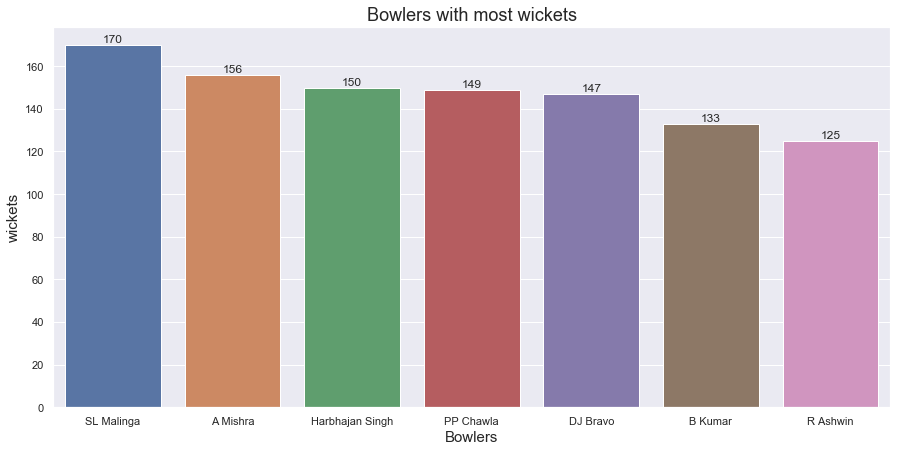

In [71]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.set_title('Bowlers with most wickets', fontsize =  18)
ax.set_xlabel('Bowlers', fontsize = 15)
ax.set_ylabel('Wickets', fontsize = 15)
ax = sns.barplot(x = data.index, y = data.wickets, data = data)
i = 0
for index, row in data.iterrows():
    ax.text(i, row.wickets + 1, str(row.wickets), ha = 'center')
    i += 1

**Note** : while calculating bowler economy, i'm considering those bowlers who have bowled more than 500 balls in IPL. 

In [72]:
# total runs conceded by each bowler
runs_conceded = deliveries_main.groupby('bowler').sum()['total_runs']

# overs bowled by each bowler
overs = deliveries_main.groupby('bowler').over.count().sort_values(ascending = False)[:100]/6

In [73]:
economy = runs_conceded / overs
economy.sort_values()
lowest_economy_bowlers = economy.loc[economy.notnull()].sort_values()

In [74]:
# Lowest Economy Bowlers in IPL Who Bowled at least 500 Balls

df = pd.DataFrame(data = lowest_economy_bowlers, index = lowest_economy_bowlers.index, columns = ['economy'])
df = df.head(10)
df

,economy
bowler,
A Kumble,6.646999
DW Steyn,6.671500
M Muralitharan,6.698292
R Ashwin,6.746021
SP Narine,6.782308
Rashid Khan,6.819168
DL Vettori,6.833121
J Botha,6.922426
Harbhajan Singh,7.041437


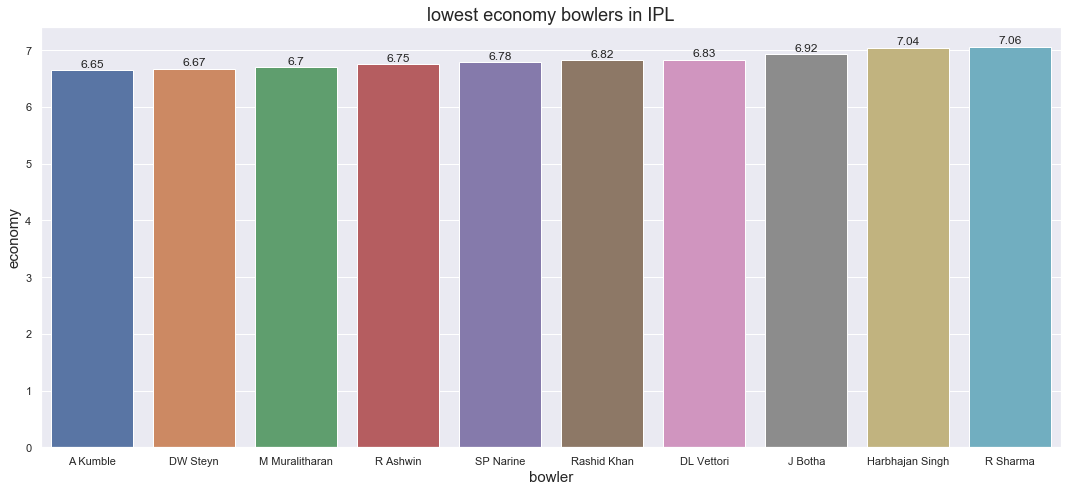

In [75]:
fig, ax = plt.subplots(figsize= (15, 7))
ax.set_title('lowest economy bowlers in IPL', fontsize = 18)
ax.set_xlabel('Bowlers', fontsize = 15)
ax.set_ylabel('economy', fontsize = 15)
ax = sns.barplot(data = df, x = df.index, y = df.economy)
i = 0
for index, row in df.iterrows():
    ax.text(i, row.economy + 0.05, str(round(row.economy, 2)), ha = 'center')
    i += 1
fig.tight_layout()

In [232]:
# Home ground winning percentage

data = matches.groupby(['venue', 'winner']).count().sort_values(by = 'city', ascending = False).reset_index().\
                                                                drop_duplicates(subset = 'winner')[:8]
data = data[['venue', 'winner', 'city']]
data = data.rename(columns = {'winner' :'Home ground team', 'city' : 'No_of_wins'})

In [233]:
team1= matches.groupby(['venue', 'team1']).count().sort_values(ascending = False, by = 'city').\
                                                reset_index()[['venue', 'team1', 'city']].drop_duplicates(subset = 'team1')[:8]

team2= matches.groupby(['venue', 'team2']).count().sort_values(ascending = False, by = 'city').\
                                                reset_index()[['venue', 'team2', 'city']].drop_duplicates(subset = 'team2')[:8]

In [234]:
team1.city += team2.city
team1.sort_values(by= 'venue', inplace = True)
team1.reset_index(inplace =True, drop = True)

data.sort_values(by = 'venue', inplace = True)
data = data.reset_index(drop = True)
data['No_of_matches_played'] = team1['city']
data['Home ground winning percentage'] = (round(data['No_of_wins'] / data['No_of_matches_played'], 2)) * 100
data.sort_values(by = 'Home ground winning percentage', inplace = True)
data

,venue,Home ground team,No_of_wins,No_of_matches_played,Home ground winning percentage
1,Feroz Shah Kotla,Delhi Daredevils,27,70,39.0
4,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,18,35,51.0
2,M Chinnaswamy Stadium,Royal Challengers Bangalore,34,63,54.0
0,Eden Gardens,Kolkata Knight Riders,45,74,61.0
7,Wankhede Stadium,Mumbai Indians,42,67,63.0
3,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,34,53,64.0
5,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,25,38,66.0
6,Sawai Mansingh Stadium,Rajasthan Royals,32,37,86.0


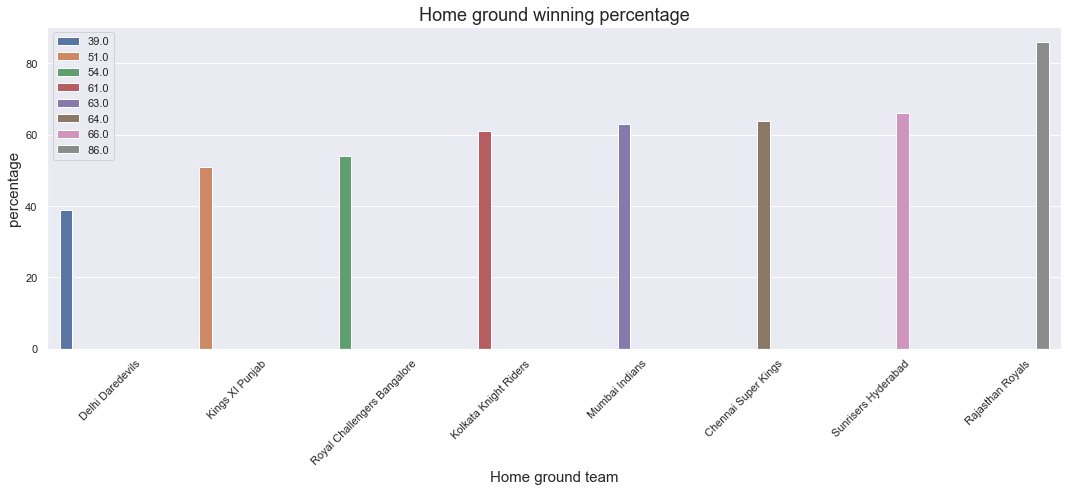

In [265]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.set_title('Home ground winning percentage', fontsize = 18)
ax.set_xlabel('Teams', fontsize = 15)
ax.set_ylabel('percentage', fontsize = 15)
g = ax.set_xticklabels(data['Home ground team'],rotation  = 45)
ax = sns.barplot(x = 'Home ground team', y = 'Home ground winning percentage', data = data, hue = 'Home ground winning percentage')
ax.set_ylabel('percentage', fontsize = 15)
ax.legend(loc = 'upper left')
fig.tight_layout()

In [269]:
# Most no of time player of the match
data = matches.player_of_match.value_counts()
pd.DataFrame(data = data, index = data.index)[:10]

,player_of_match
CH Gayle,21
AB de Villiers,20
RG Sharma,17
MS Dhoni,17
DA Warner,17
YK Pathan,16
SR Watson,15
SK Raina,14
G Gambhir,13
V Kohli,12


## Conclusions :

1. Most successful teams are Mumbai Indians, Chennai Super Kings, Sunrisers Hyderabad with more than 50% winning rate in IPL.
2. DA Warner has contributed a lot to Sunrisers Hyderabad team in terms of 3 times orange cap winners and being one of the top scorer in most no of runs list in IPL and most no of player of the matches list.
3. R Ashwin and Harbhajan Singh are leading bowlers in the list of lowest economy and highest wicket takers list.
4. V Kohli is Highest Run scorer and SL Malinga is the Highest wicket taker in IPL
5. Winning percentage is almost equal for the teams who bat/bowl First. 
6. Rajasthan Royals has the Highest Home Groun